In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from scipy import stats
from scipy.signal import get_window
import glob
import time

def filtering_func(freqs, fft, f1, f2):
    filtered_fft = fft.copy() #in this way it doesn't reference to fft

    fft_in_range = fft[(freqs >= f1) & (freqs <= f2)]
    print(f'fft_in_range: {fft_in_range} ')

    range_avg = np.mean(fft_in_range)
    print(f'range_avg: {range_avg}')
    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]
    print(f"peak_indices: {peak_indices}")
    print(f"fft[peak_indices]: {fft_in_range[peak_indices]}")
    peak_f = freqs[(freqs >= f1) & (freqs <= f2)][peak_indices]
    print(f"peak_f: {peak_f}")

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}')
    filtered_fft[np.isin(freqs, peak_f)] = range_avg
    return filtered_fft

In [16]:
mint = 0
maxt = 10
N = 50000
step = ( maxt - mint )/N
times = np.arange(0, 10, step)
print(times)
print(f"len(times): {len(times)}")

f_s = N/maxt
print(f"f_s = {f_s} = 1/step = {1/step}")

amplitudes1 = np.sin(5 * 2*np.pi * times)
amplitudes2 = np.sin(3 * 2*np.pi * times +np.pi)
amplitudes = amplitudes2 + amplitudes1

[0.0000e+00 2.0000e-04 4.0000e-04 ... 9.9994e+00 9.9996e+00 9.9998e+00]
len(times): 50000
f_s = 5000.0 = 1/step = 5000.0


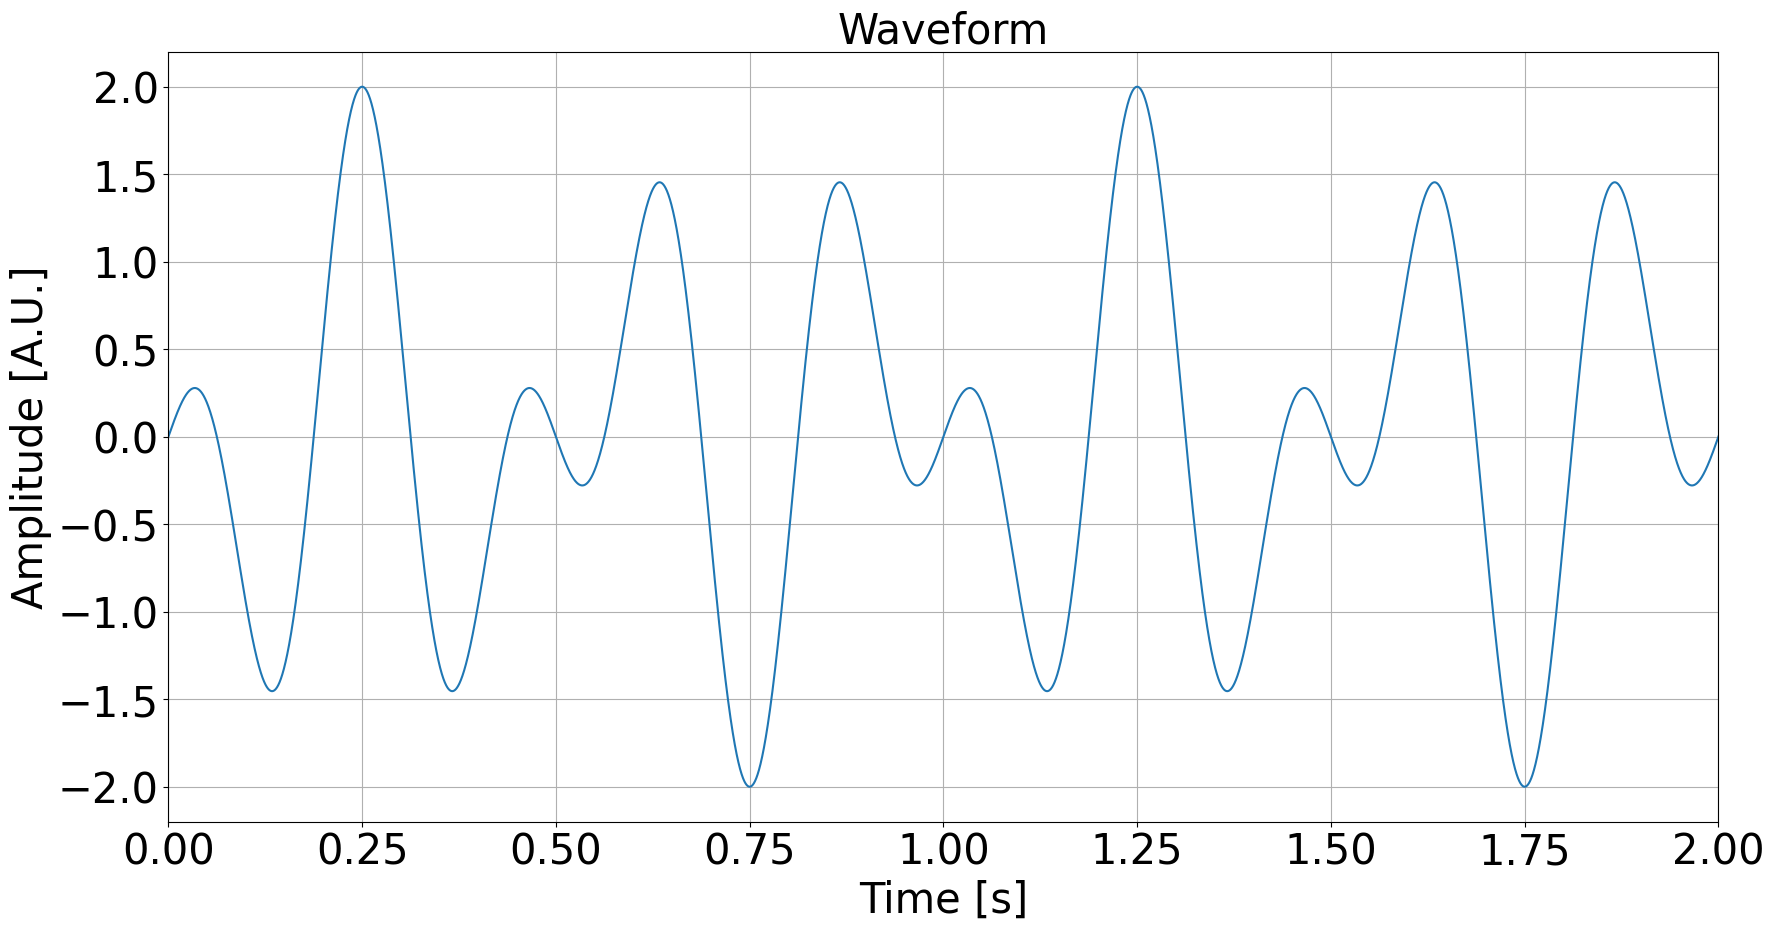

In [17]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes)
plt.title('Waveform', fontsize = 30)
plt.xlabel('Time [s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, 2)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [18]:
freqs = fft.rfftfreq(len(times), 1/f_s)
print(freqs[-1]) ##this should be the half of f_s.

print(f"len(freqs): {len(freqs)}")
magnitudes = np.abs(fft.rfft(amplitudes)) #when i'm filtering, i'm filtering something complex

2500.0
len(freqs): 25001


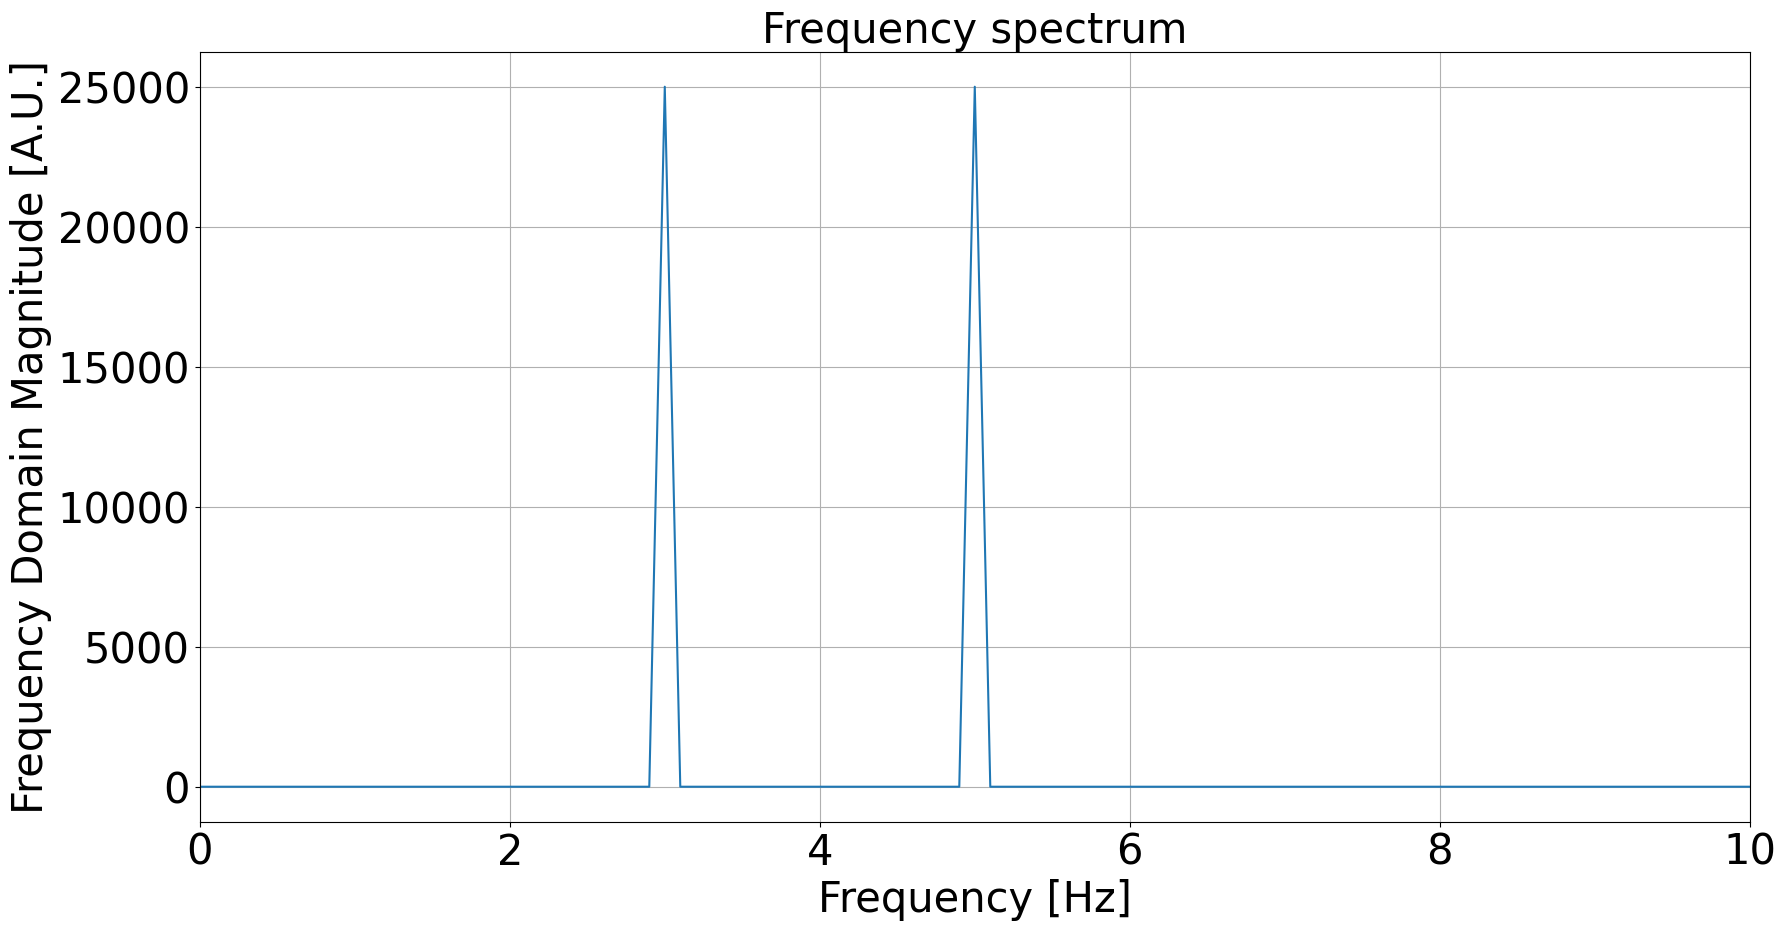

In [19]:
plt.figure(figsize=(20, 10))
plt.plot(freqs, magnitudes)
plt.title('Frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [Hz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0, f_s /500)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [20]:
f1 = 2
f2 = 4

## Filtering

In [48]:
filtered_fft = filtering_func(freqs, magnitudes, f1, f2)

fft_in_range: [5.52704498e-12 1.02088463e-12 9.66273727e-12 1.02126593e-11
 1.60193313e-12 1.74880439e-11 2.03375141e-11 2.46034208e-12
 4.20063855e-11 8.23589305e-11 2.50000000e+04 8.30128564e-11
 4.15736675e-11 1.62293466e-12 2.17600901e-11 2.02867150e-11
 3.11718867e-12 7.90305696e-12 1.07162074e-11 3.07486837e-12
 5.33877518e-12] 
range_avg: 1190.4761904762092
peak_indices: [10]
fft[peak_indices]: [25000.]
peak_f: [3.]
sum: 1


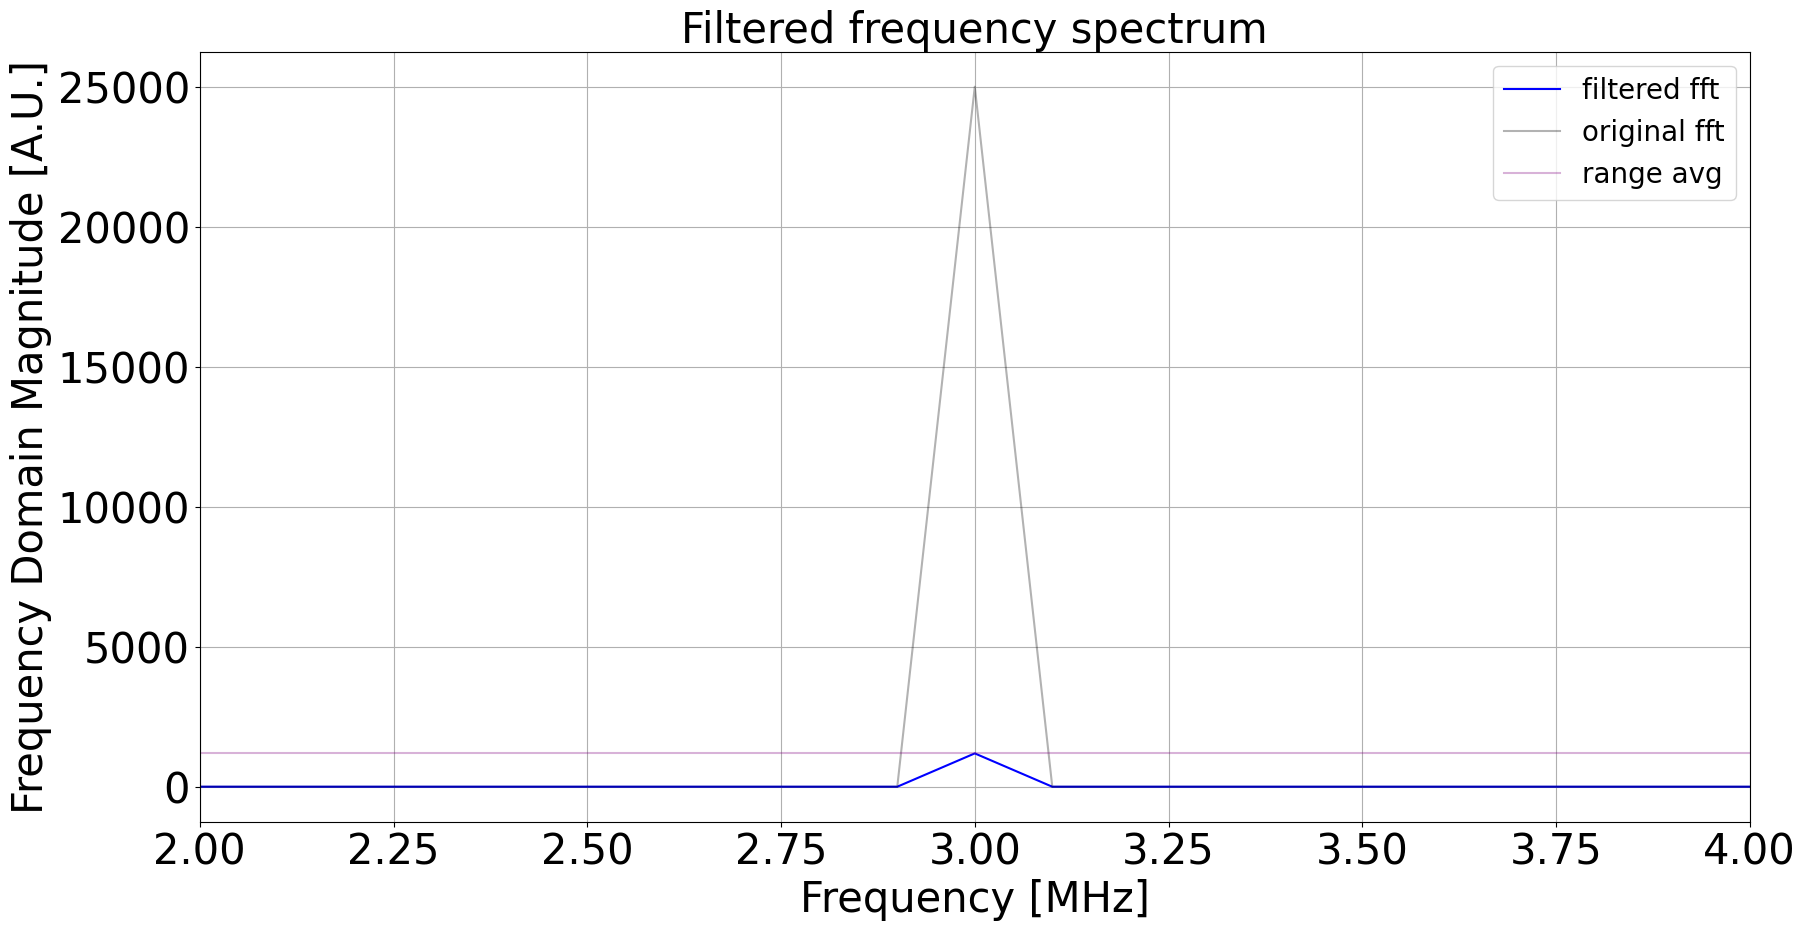

In [39]:
plt.figure(figsize=(20, 10))
#plt.errorbar(freqs, avg_fft_au, yerr = stds_fft, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(freqs, filtered_fft, color = 'blue', label = 'filtered fft')
plt.plot(freqs, magnitudes, alpha = 0.3, color = 'k', label = 'original fft')
plt.axhline( 1190.4761904762092, color = 'purple', alpha = 0.3, label = 'range avg')

#plt.axvline(465.97762683, color = 'red')
plt.title('Filtered frequency spectrum', fontsize = 30)
plt.xlabel('Frequency [MHz]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(f1, f2)
plt.legend(loc = 'best', fontsize = 20)
#plt.semilogx()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## IFFT

In [41]:
times_ifft = np.arange(N) / f_s 
amplitudes_ifft = fft.irfft(filtered_fft)


## Compare to average waveform

In [42]:
original_wf = fft.irfft(magnitudes)

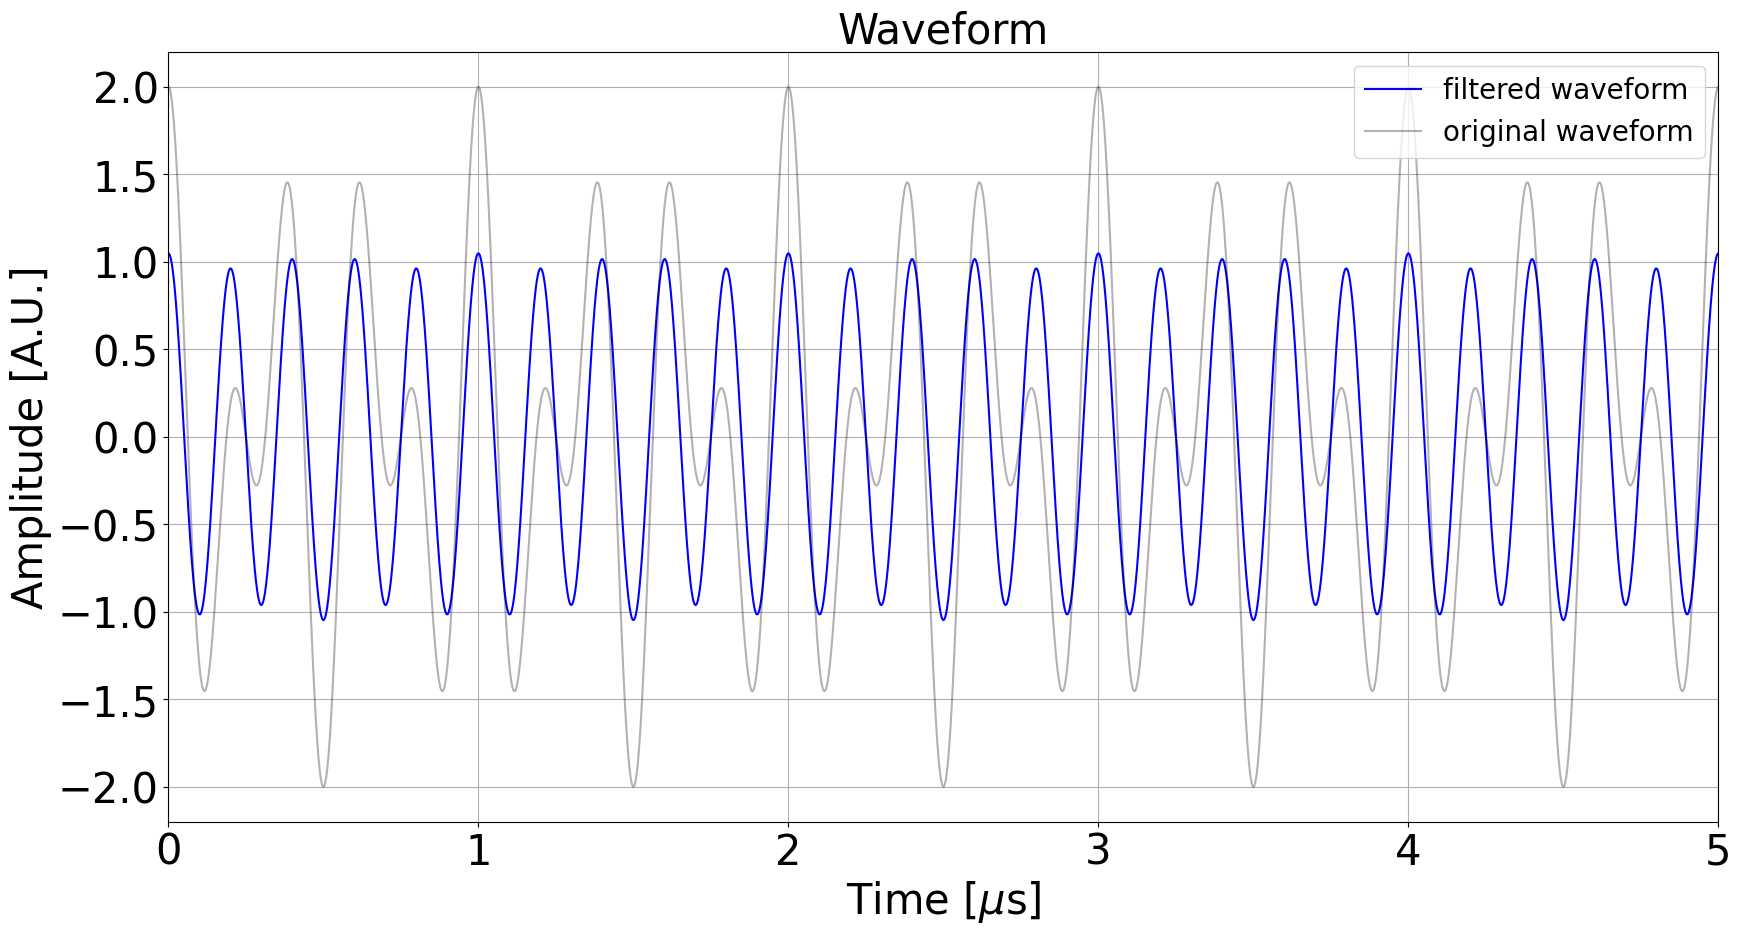

In [43]:
plt.figure(figsize = (20, 10))
plt.plot(times_ifft, amplitudes_ifft, label = 'filtered waveform', color = 'blue')
plt.plot(times_ifft, original_wf, label = 'original waveform', color = 'k', alpha = 0.3)
plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.xlim(0, 5)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

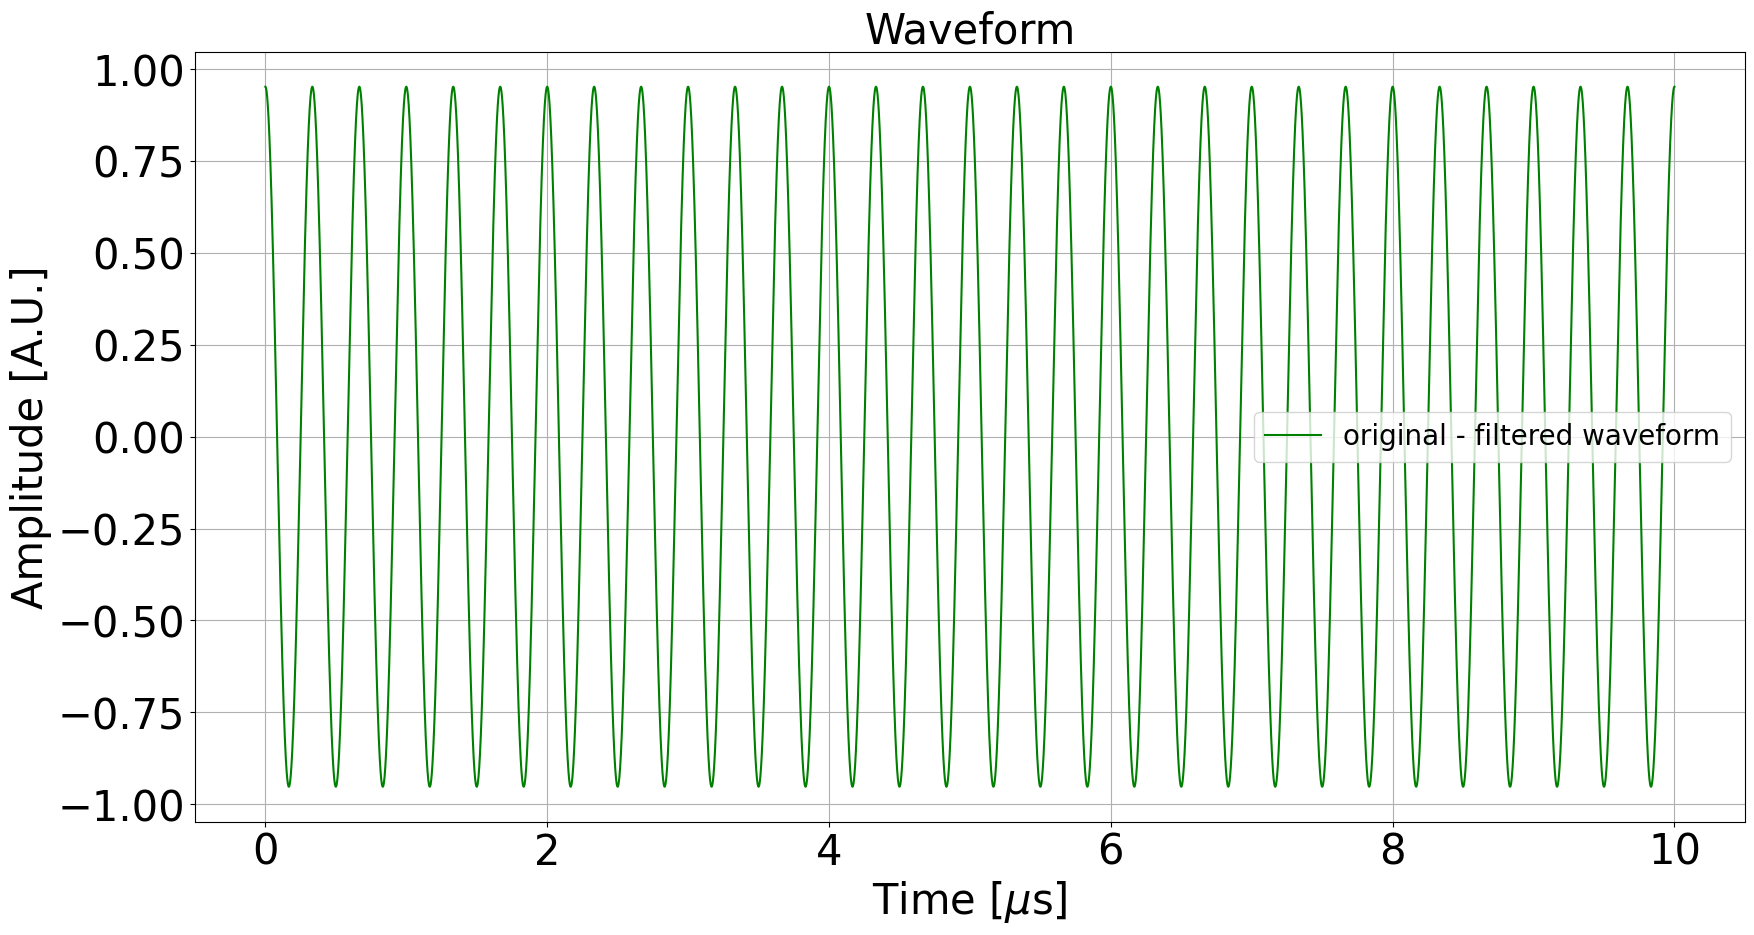

In [44]:
plt.figure(figsize = (20, 10))
plt.plot(times_ifft, original_wf - amplitudes_ifft, label = 'original - filtered waveform', color = 'green')
plt.title('Waveform', fontsize = 30)
plt.xlabel(r'Time [$\mu$s]', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Amplitude [A.U.]', fontsize = 30)
plt.yticks(fontsize = 30)
plt.grid(True)
plt.legend(loc = 'best', fontsize = 20)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [27]:
#CHECK THIS WITH 2 SIMPLE WF